In [168]:
import pandas as pd

In [169]:
teams=pd.read_csv('teams.csv')

In [170]:
teams.head()

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0


In [171]:
teams = teams[['team','country','year','athletes','age','prev_medals','medals']]

## Here the age is the avg age of all the player for a country

In [172]:
teams

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0.0,0
2140,ZIM,Zimbabwe,2004,14,25.1,0.0,3
2141,ZIM,Zimbabwe,2008,16,26.1,3.0,4
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0


## Checking the corelation between the medals coloumn and other coloumns

In [173]:
teams_numerical_columns = teams.select_dtypes(include=['number'])


In [174]:
teams_numerical_columns.corr()['medals']

year          -0.021603
athletes       0.840817
age            0.025096
prev_medals    0.920048
medals         1.000000
Name: medals, dtype: float64

In [175]:
import seaborn as sns

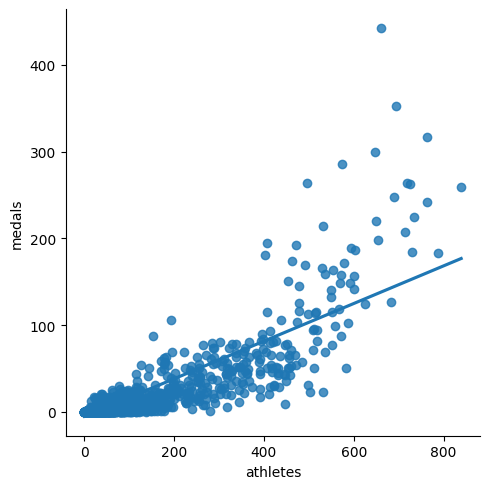

In [176]:
sns.lmplot(x='athletes',y='medals', data=teams, fit_reg=True, ci=None)

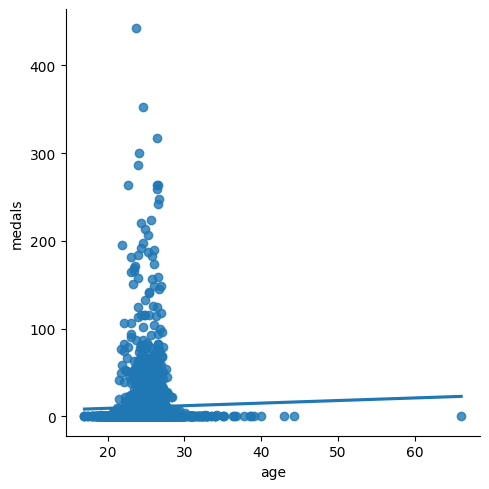

In [177]:
sns.lmplot(x='age',y='medals', data=teams, fit_reg=True, ci=None)

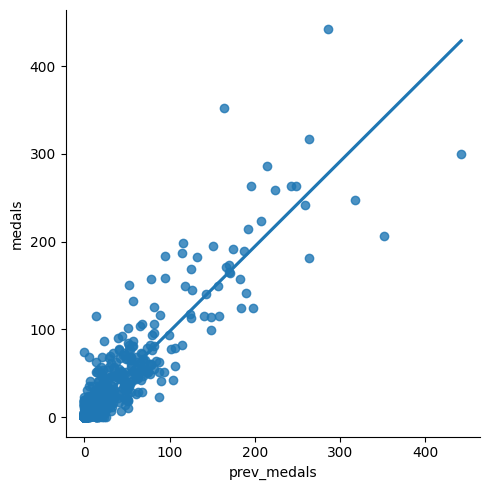

In [178]:
sns.lmplot(x='prev_medals',y='medals', data=teams, fit_reg=True, ci=None)

<Axes: ylabel='Frequency'>

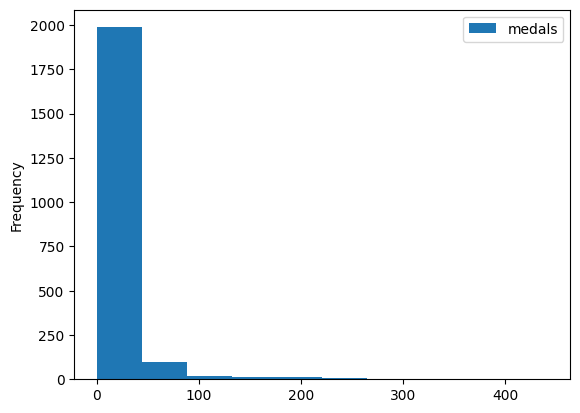

In [179]:
teams.plot.hist(y='medals')

<Axes: xlabel='medals', ylabel='Count'>

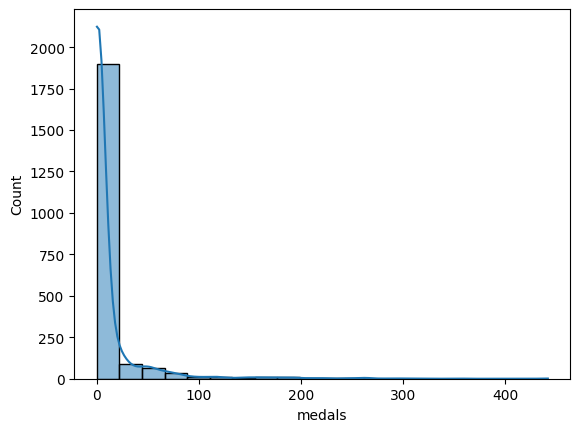

In [180]:
sns.histplot(data=teams, x='medals', bins=20, kde=True)



In [181]:
# Handaling missing value

teams.shape


(2144, 7)

In [182]:
teams[teams.isnull().any(axis=1)]

,team,country,year,athletes,age,prev_medals,medals
19,ALB,Albania,1992,9,25.3,NaN,0
26,ALG,Algeria,1964,7,26.0,NaN,0
39,AND,Andorra,1976,3,28.3,NaN,0
50,ANG,Angola,1980,17,17.4,NaN,0
59,ANT,Antigua and Barbuda,1976,17,23.2,NaN,0
...,...,...,...,...,...,...,...
2092,VIN,Saint Vincent and the Grenadines,1988,6,20.5,NaN,0
2103,YAR,North Yemen,1984,3,27.7,NaN,0
2105,YEM,Yemen,1992,8,19.6,NaN,0
2112,YMD,South Yemen,1988,5,23.6,NaN,0


In [183]:
# Droping missing value

teams = teams.dropna()

In [184]:
teams

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0.0,0
2140,ZIM,Zimbabwe,2004,14,25.1,0.0,3
2141,ZIM,Zimbabwe,2008,16,26.1,3.0,4
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0


In [185]:
train = teams[teams['year']< 2012].copy()
test = teams[teams['year']>=2012].copy()

In [186]:
train.shape

(1609, 7)

In [187]:
test.shape

(405, 7)

In [188]:
from sklearn.linear_model import LinearRegression

reg=LinearRegression()

In [189]:
predictors=['athletes','prev_medals']
target='medals'

In [190]:
reg.fit(train[predictors],train['medals'])

LinearRegression()

In [191]:
prediction=reg.predict(test[predictors])

In [192]:
prediction

array([-9.61221245e-01, -1.17633261e+00, -1.42503158e+00, -1.71184673e+00,
        2.15562926e+00,  3.91463636e+00, -1.71184673e+00, -1.85525431e+00,
        3.67563128e-01, -2.77770967e-01, -1.85525431e+00, -1.49673537e+00,
        4.67519911e+01,  2.87550937e+01,  4.58450091e+00,  2.54773581e+00,
       -1.85525431e+00, -1.64014295e+00, -1.85525431e+00, -1.85525431e+00,
        1.46556876e+02,  1.20571799e+02,  6.56314795e+00,  3.95275254e+00,
        7.34283247e+00,  1.03117468e+01,  5.19171882e+00,  3.58517645e+00,
       -1.64014295e+00, -1.64014295e+00, -1.56843916e+00, -1.20992022e+00,
       -1.71184673e+00, -1.42503158e+00,  1.17929959e+01,  1.00049298e+01,
       -1.78355052e+00, -1.71184673e+00, -1.56843916e+00, -1.56843916e+00,
       -1.99866189e+00, -1.99866189e+00, -1.56843916e+00, -1.35332779e+00,
       -1.92695810e+00, -1.92695810e+00,  3.28912706e+01,  2.53042547e+01,
       -1.78355052e+00, -1.28162400e+00, -1.85525431e+00, -3.87590939e-01,
        7.83480779e+01,  

In [193]:
test['model_prediction']=prediction

In [194]:
test

,team,country,year,athletes,age,prev_medals,medals,model_prediction
6,AFG,Afghanistan,2012,6,24.8,1.0,1,-0.961221
7,AFG,Afghanistan,2016,3,24.7,1.0,0,-1.176333
24,ALB,Albania,2012,10,25.7,0.0,0,-1.425032
25,ALB,Albania,2016,6,23.7,0.0,0,-1.711847
37,ALG,Algeria,2012,39,24.8,2.0,1,2.155629
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,-1.926958
2131,ZAM,Zambia,2012,7,22.6,0.0,0,-1.640143
2132,ZAM,Zambia,2016,7,24.1,0.0,0,-1.640143
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,1.505767


In [195]:
test.loc[test['model_prediction']<0,'model_prediction']=0

In [196]:
test['model_prediction']=test['model_prediction'].round()

In [197]:
test

,team,country,year,athletes,age,prev_medals,medals,model_prediction
6,AFG,Afghanistan,2012,6,24.8,1.0,1,0.0
7,AFG,Afghanistan,2016,3,24.7,1.0,0,0.0
24,ALB,Albania,2012,10,25.7,0.0,0,0.0
25,ALB,Albania,2016,6,23.7,0.0,0,0.0
37,ALG,Algeria,2012,39,24.8,2.0,1,2.0
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,0.0
2131,ZAM,Zambia,2012,7,22.6,0.0,0,0.0
2132,ZAM,Zambia,2016,7,24.1,0.0,0,0.0
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,2.0


In [221]:
test

,team,country,year,athletes,age,prev_medals,medals,model_prediction
6,AFG,Afghanistan,2012,6,24.8,1.0,1,0.0
7,AFG,Afghanistan,2016,3,24.7,1.0,0,0.0
24,ALB,Albania,2012,10,25.7,0.0,0,0.0
25,ALB,Albania,2016,6,23.7,0.0,0,0.0
37,ALG,Algeria,2012,39,24.8,2.0,1,2.0
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,0.0
2131,ZAM,Zambia,2012,7,22.6,0.0,0,0.0
2132,ZAM,Zambia,2016,7,24.1,0.0,0,0.0
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,2.0


In [198]:
# Mean Absolute error

from sklearn.metrics import mean_absolute_error

error=mean_absolute_error(test['medals'], test['model_prediction'])


In [199]:
error

3.2987654320987656

In [200]:
teams.describe()['medals']

count    2014.000000
mean       10.990070
std        33.627528
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max       442.000000
Name: medals, dtype: float64

In [201]:
# Error must be below the std deviation

In [202]:
# Checking for particular country

test[test['team'] == 'USA']

,team,country,year,athletes,age,prev_medals,medals,model_prediction
2053,USA,United States,2012,689,26.7,317.0,248,285.0
2054,USA,United States,2016,719,26.4,248.0,264,236.0


In [203]:
test[test['team'] == 'IND']

,team,country,year,athletes,age,prev_medals,medals,model_prediction
907,IND,India,2012,95,26.0,3.0,6,7.0
908,IND,India,2016,130,26.1,6.0,2,12.0


In [204]:
errors = (test['medals'] - test['model_prediction']).abs()

In [205]:
errors

6       1.0
7       0.0
24      0.0
25      0.0
37      1.0
       ... 
2111    0.0
2131    0.0
2132    0.0
2142    2.0
2143    0.0
Length: 405, dtype: float64

In [206]:
error_by_team = errors.groupby(test['team']).mean()

In [207]:
error_by_team

team
AFG    0.5
ALB    0.0
ALG    1.5
AND    0.0
ANG    0.0
      ... 
VIE    1.0
VIN    0.0
YEM    0.0
ZAM    0.0
ZIM    1.0
Length: 204, dtype: float64

In [208]:
# How many medal a country won on avg

medals_by_team=test['medals'].groupby(test['team']).mean()

In [209]:
error_ratio =error_by_team/medals_by_team

In [210]:
error_ratio

team
AFG    1.0
ALB    NaN
ALG    1.0
AND    NaN
ANG    NaN
      ... 
VIE    1.0
VIN    NaN
YEM    NaN
ZAM    NaN
ZIM    inf
Length: 204, dtype: float64

In [211]:
error_ratio[~pd.isnull(error_ratio)]

team
AFG    1.000000
ALG    1.000000
ARG    0.853659
ARM    0.428571
AUS    0.367347
         ...   
USA    0.126953
UZB    0.625000
VEN    1.750000
VIE    1.000000
ZIM         inf
Length: 102, dtype: float64

In [212]:
import numpy as np
error_ratio=error_ratio[np.isfinite(error_ratio)]

In [213]:
error_ratio

team
AFG    1.000000
ALG    1.000000
ARG    0.853659
ARM    0.428571
AUS    0.367347
         ...   
UKR    0.951220
USA    0.126953
UZB    0.625000
VEN    1.750000
VIE    1.000000
Length: 97, dtype: float64

<Axes: ylabel='Frequency'>

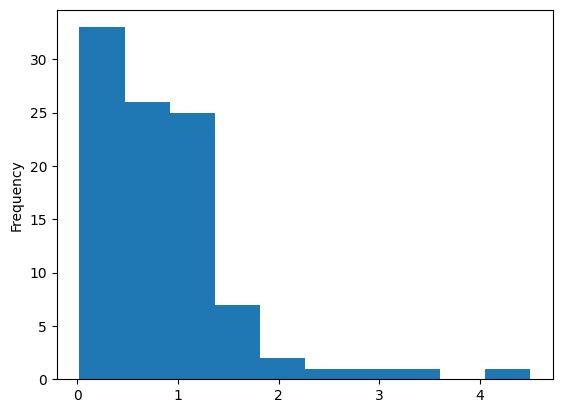

In [214]:
error_ratio.plot.hist()

In [215]:
error_ratio.sort_values()

team
FRA    0.022472
CAN    0.048387
NZL    0.063492
RUS    0.082353
ITA    0.121429
         ...   
MAR    2.000000
EGY    2.400000
HKG    3.000000
POR    3.333333
AUT    4.500000
Length: 97, dtype: float64

In [216]:
teams.head()

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0


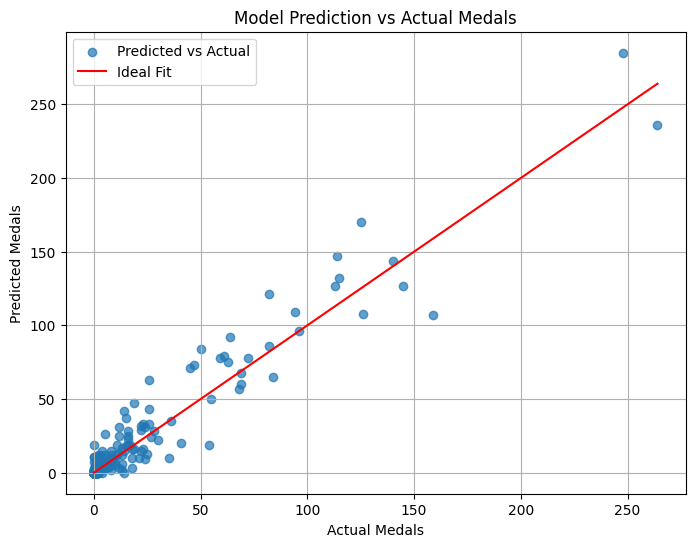

In [223]:
import matplotlib.pyplot as plt  # Ensure Matplotlib is imported

# Plot the graph of 'model_prediction' vs 'medals'
plt.figure(figsize=(8, 6))
plt.scatter(test['medals'], test['model_prediction'], alpha=0.7, label="Predicted vs Actual")
plt.plot([test['medals'].min(), test['medals'].max()], 
         [test['medals'].min(), test['medals'].max()], 
         color='red', label="Ideal Fit")

# Adding titles and labels
plt.title("Model Prediction vs Actual Medals")
plt.xlabel("Actual Medals")
plt.ylabel("Predicted Medals")
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


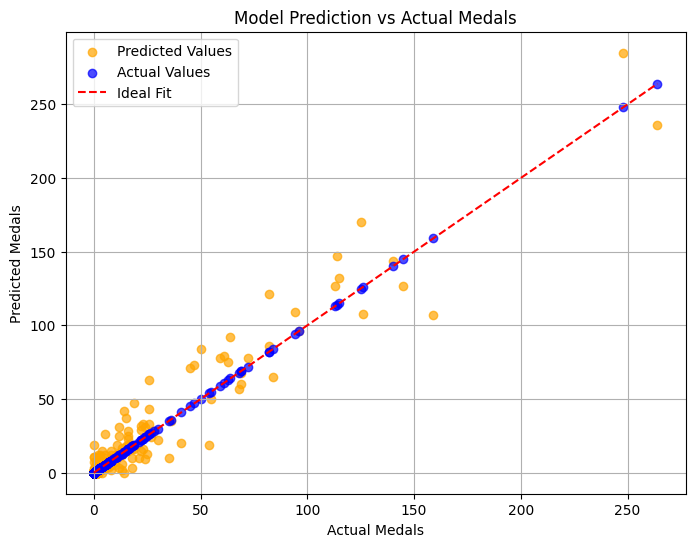

In [224]:
import matplotlib.pyplot as plt

# Plot the graph of 'model_prediction' vs 'medals'
plt.figure(figsize=(8, 6))
plt.scatter(test['medals'], test['model_prediction'], color='orange', alpha=0.7, label="Predicted Values")
plt.scatter(test['medals'], test['medals'], color='blue', alpha=0.7, label="Actual Values")
plt.plot([test['medals'].min(), test['medals'].max()], 
         [test['medals'].min(), test['medals'].max()], 
         color='red', linestyle='--', label="Ideal Fit")

# Adding titles and labels
plt.title("Model Prediction vs Actual Medals")
plt.xlabel("Actual Medals")
plt.ylabel("Predicted Medals")
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


/var/folders/6r/n2j69kzn51g982sz8qjdw00r0000gn/T/ipykernel_19748/2927235026.py:27: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


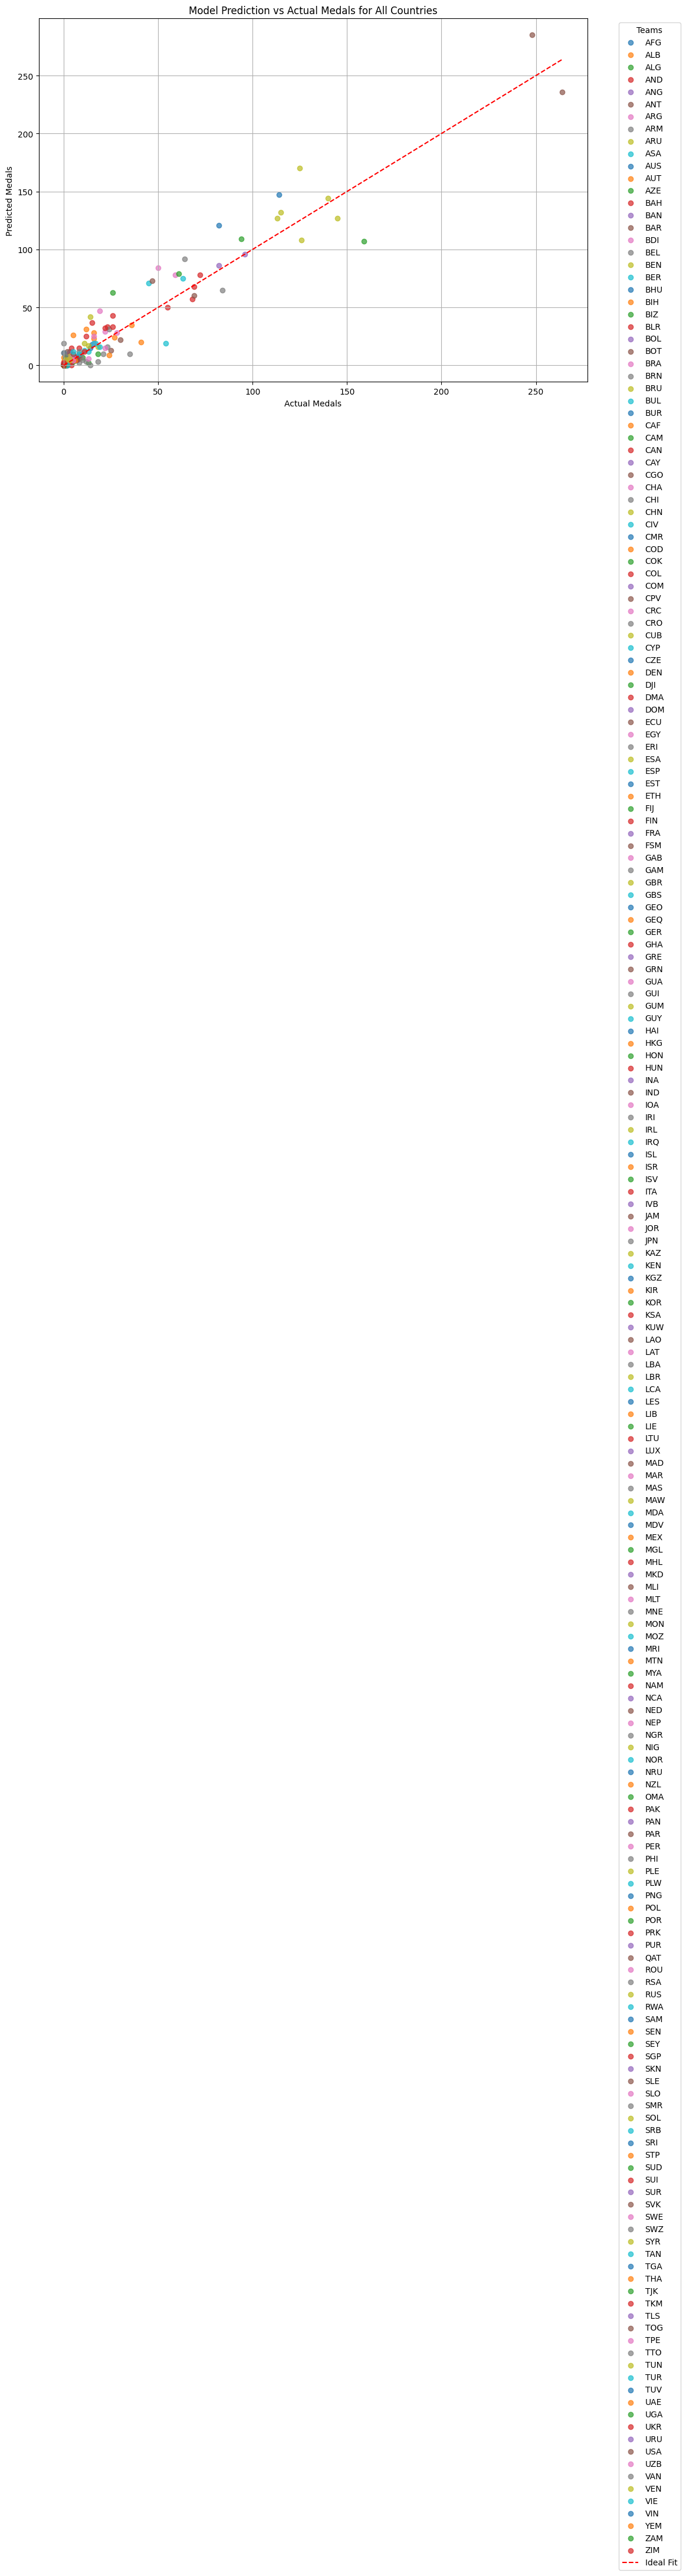

In [228]:
import matplotlib.pyplot as plt

# Initialize the plot
plt.figure(figsize=(12, 8))

# Iterate through each team
teams = test['team'].unique()
for team in teams:
    team_data = test[test['team'] == team]  # Filter data for the current team
    
    # Add scatter points for the team's actual vs predicted values
    plt.scatter(team_data['medals'], team_data['model_prediction'], label=team, alpha=0.7)

# Add ideal fit line
plt.plot([test['medals'].min(), test['medals'].max()], 
         [test['medals'].min(), test['medals'].max()], 
         color='red', linestyle='--', label="Ideal Fit")

# Adding titles and labels
plt.title("Model Prediction vs Actual Medals for All Countries")
plt.xlabel("Actual Medals")
plt.ylabel("Predicted Medals")
plt.legend(loc="best", bbox_to_anchor=(1.05, 1), title="Teams")
plt.grid(True)

# Adjust layout to make room for the legend
plt.tight_layout()

# Display the plot
plt.show()
